In [1]:
from vif.falcon.oracle.guided_oracle.expressions import (
    OracleExpression,
    angle,
    aligned,
    color,
    count,
    mirrored,
    placement,
    position,
    size,
    shape,
    within,
)


/home/creux/Documents/AI/VIFagent/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import openai
from vif.models.detection import BoundingBox, SegmentationMask
from vif.utils.detection_utils import get_bounding_boxes, get_segmentation_masks
import sys
from loguru import logger
import os
from google import genai
from google.genai import types as genTypes
from datasets import load_dataset
from PIL import Image

used_model = "qwen/qwen3-vl-8b-instruct"

gclient = genai.Client(
    api_key=os.environ.get("GOOGLE_API_KEY"),
    http_options=genTypes.HttpOptions(api_version="v1alpha"),
)
client = openai.Client(
    base_url="https://openrouter.ai/api/v1",
    api_key=os.environ.get("OPENROUTER_API_KEY"),
)
from vif.falcon.oracle.guided_oracle.guided_code_oracle import OracleGuidedCodeModule


or_module: OracleGuidedCodeModule = OracleGuidedCodeModule(
    model=None, client=None, visual_client=gclient, property_model=used_model,property_client=client
)

2025-11-18 14:55:51.026 | INFO     | vif.utils.caching:instantiate_cache:26 - seg_cache cache loaded


In [3]:
logger.configure(handlers=[{"sink": sys.stdout, "level": "INFO"}])
veritikz_dataset = load_dataset("CharlyR/VeriTikz", "full", split="train")
i=0

Make the nose of the cat blue
False


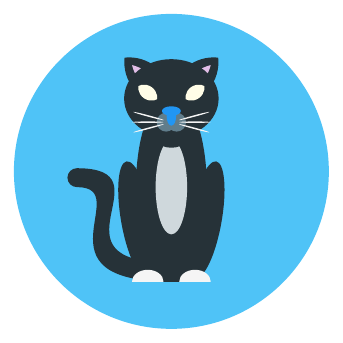

In [28]:
row = veritikz_dataset[i]

perfect_image = row["theoretical_perfect_image"]
original_image = row["original_image"]

print(row["instruction"])
print(row["expected"])
display(perfect_image)
i+=1 

In [ ]:
def test_valid_customization() -> bool:
        return color("cat's nose","blue")
import inspect


def get_or_code(instruction,image):
        
        return inspect.getsource(test_valid_customization),None

or_module.get_oracle_code = get_or_code

In [11]:
oracle_method,usage = or_module.get_oracle(row["instruction"],original_image)

2025-11-18 14:56:44.134 | INFO     | vif.falcon.oracle.guided_oracle.guided_code_oracle:get_oracle:132 - Creating Oracle for instruction Make the body of the bee longer, and pointy
2025-11-18 14:56:44.135 | INFO     | vif.falcon.oracle.guided_oracle.guided_code_oracle:get_oracle:153 - Oracle created: def test_valid_customization() -> bool:
        return count("wings",4) & color("bee's body","black & yellow")



2025-11-18 14:56:44.273 | INFO     | vif.utils.detection_utils:get_bounding_boxes:121 - Getting boxe for feature : wings
2025-11-18 14:56:44.274 | INFO     | vif.utils.detection_utils:get_bounding_boxes:135 - .Detect the {label}, if present. Output a json list where each entry contains the 2D bounding box in "box_2d" and the label in "label".
2025-11-18 14:56:46.052 | INFO     | vif.utils.detection_utils:get_bounding_boxes:152 - LLM segmentation response: Here are the bounding box detections:
```json
[
  {"box_2d": [237, 225, 465, 485], "label": "wing"},
  {"box_2d": [460, 480, 691, 725], "label": "wing"}
]
```
2025-11-18 14:56:46.053 | WARNING  | vif.utils.detection_utils:log_and_append_token_data:330 - box detection worked.
2025-11-18 14:56:46.055 | INFO     | vif.utils.detection_utils:get_segmentation_masks:225 - Getting masks for features : bee's body
2025-11-18 14:57:46.502 | INFO     | vif.utils.detection_utils:get_segmentation_masks:261 - LLM segmentation response: ```json
[
  {
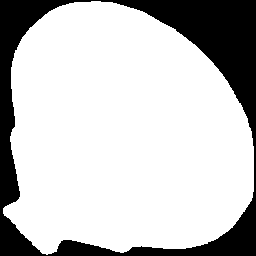

In [12]:
orac_res = oracle_method(perfect_image)

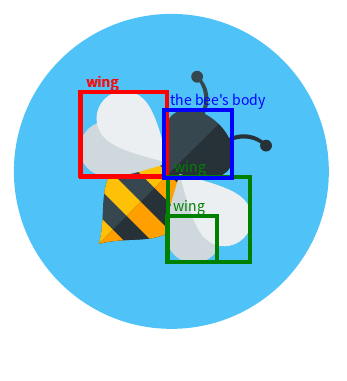

In [13]:
from vif.utils.image_utils import plot_segmentation_masks


plot_segmentation_masks(original_image,orac_res.boxes)

In [9]:
orac_res.condition

False

In [14]:
orac_res.feedbacks


['The number of wings is 2, but should be 4.',
 "The color of the the bee's body should have been black & yellow, but is closer to very dark blue, blue, very dark grey."]